# Trabalho 2 - Aprendizado Não Supervisionado

## Professor: Paulo Cotta

### Ideia do trabalho


Aprendizado não supervisionado para detecção de anomalias no preço das ações.
Temos um .csv que é o nosso dataset (conjunto de dados).

License of dataset: Anomaly detection in stock options pricing - MIT

In [0]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
caminho = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_2_pratico_IESB-master/data.csv';

data = pd.read_csv(caminho)
data.head()

,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
0,0,174.09,GS160108C00125000,call,01/08/2016,01/05/2016,125.0,0.0,46.95,50.80,0,0,0,0.0874,0.0,3.1911,1.0000,0.0000,0.0000,0.0000,GS160108C00125000
1,1,174.09,GS160108P00125000,put,01/08/2016,01/05/2016,125.0,0.0,0.00,0.31,0,0,0,1.9822,0.0,2.2141,-0.0150,0.0014,-0.2242,0.0053,GS160108P00125000
2,2,174.09,GS160108C00130000,call,01/08/2016,01/05/2016,130.0,0.0,41.80,45.80,0,0,0,0.0874,0.0,2.8946,1.0000,0.0000,0.0000,0.0000,GS160108C00130000
3,3,174.09,GS160108P00130000,put,01/08/2016,01/05/2016,130.0,0.0,0.00,0.31,0,0,0,1.7931,0.0,1.9882,-0.0175,0.0017,-0.2310,0.0060,GS160108P00130000
4,4,174.09,GS160108C00135000,call,01/08/2016,01/05/2016,135.0,0.0,36.95,40.90,0,0,0,0.0874,0.0,2.6480,1.0000,0.0000,0.0000,0.0000,GS160108C00135000


In [6]:
data.describe()

,Unnamed: 0,UnderlyingPrice,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega
count,858.000000,8.580000e+02,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,428.500000,1.740900e+02,186.463869,9.109988,20.894744,22.509755,20.349650,376.848485,384.405594,0.630892,0.159149,0.590690,-0.078274,0.008780,-0.077531,0.150592
std,247.827561,2.673199e-12,47.751953,19.266645,27.679726,29.122069,86.925383,1512.931102,1513.398965,2.198250,0.153752,0.517986,0.635420,0.010845,0.251748,0.214616
min,0.000000,1.740900e+02,80.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.054600,0.000000,0.216900,-0.997000,0.000000,-3.366600,0.000000
25%,214.250000,1.740900e+02,152.500000,0.000000,0.360000,0.472500,0.000000,0.000000,0.000000,0.264750,0.000000,0.291025,-0.710300,0.001900,-0.069675,0.018050
50%,428.500000,1.740900e+02,185.000000,0.350000,7.925000,8.700000,0.000000,7.000000,9.000000,0.320950,0.214300,0.383200,0.001100,0.004700,-0.028850,0.062200
75%,642.750000,1.740900e+02,217.500000,7.662500,32.337500,35.800000,2.000000,136.500000,141.750000,0.451050,0.271050,0.634250,0.289025,0.011175,-0.012800,0.175275
max,857.000000,1.740900e+02,310.000000,113.000000,134.000000,138.800000,933.000000,21595.000000,21567.000000,37.111400,0.721600,3.242900,1.000000,0.079600,0.001000,0.991800


##### *Questão 1*

Quais são os dados de preços das ações no conjunto de dados? Explique e apresente abaixo apenas as colunas que contém tais dados.

In [58]:
data.dtypes


Unnamed: 0           int64
UnderlyingPrice    float64
OptionSymbol        object
Type                object
Expiration          object
 DataDate           object
Strike             float64
Last               float64
Bid                float64
Ask                float64
Volume               int64
OpenInterest         int64
T1OpenInterest       int64
IVMean             float64
IVBid              float64
IVAsk              float64
Delta              float64
Gamma              float64
Theta              float64
Vega               float64
AKA                 object
dtype: object

In [59]:
print (',' .join(x for x in data.columns)) 


Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration, DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA


In [60]:
#Coluna referente a compra
colun1 = data['Bid'].head()
print(colun1) 
#Coluna referente a venda
colun2 = data['Ask'].head()
print(colun2) 


0    46.95
1     0.00
2    41.80
3     0.00
4    36.95
Name: Bid, dtype: float64
0    50.80
1     0.31
2    45.80
3     0.31
4    40.90
Name: Ask, dtype: float64


#### *Questão 2*

*Aprendizado não supervisionado para encontrar discrepâncias (anomalias)*

Explique:

O que seria uma anomalia no dataset?

Para fins de detecção de anomalias, utilize algum algoritmo de aprendizado não supervisionado para identificar os cluster dos dados.

Exemplos de algoritmos não supervisionados:
- Isolation Forest
- K-Means
- KNN
- Randon Forest
- entre outros.

Apresente o código e detalhe, explicando a arquitetura criada/selecionada, além de apresentar dados de visualização (Data visualization [Utilizando Numpy, Pandas e Matplotlib]).

In [0]:
# o código aqui... ;)
# anomalias são dados com um comportamento diferente do esperado

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [61]:
newData = data[['Strike', 'UnderlyingPrice', 'Bid', 'Ask']]
newData


,Strike,UnderlyingPrice,Bid,Ask
0,125.0,174.09,46.95,50.80
1,125.0,174.09,0.00,0.31
2,130.0,174.09,41.80,45.80
3,130.0,174.09,0.00,0.31
4,135.0,174.09,36.95,40.90
...,...,...,...,...
853,270.0,174.09,94.50,99.45
854,280.0,174.09,1.19,2.55
855,280.0,174.09,104.00,108.90
856,290.0,174.09,0.76,1.90


In [81]:
metrics_df=newData
metrics_df.columns
#specify the 12 metrics column names to be modelled
to_model_columns=metrics_df.columns

clf = IsolationForest(max_samples='auto', contamination=.025, n_estimators=10, random_state=49)

clf.fit(metrics_df[to_model_columns])
pred = clf.predict(metrics_df[to_model_columns])

metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)


print(metrics_df['anomaly'].value_counts())


 1    836
-1     22
Name: anomaly, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


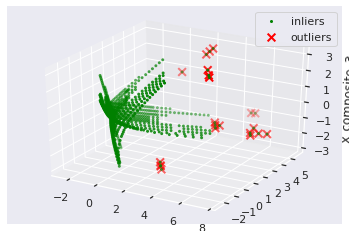

In [82]:

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(metrics_df[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()